In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1)

import missingno as msno    # 누락값 표시
import warnings
import mglearn
warnings.filterwarnings('ignore')  # 워닝 무시
from sklearn.model_selection import train_test_split
%matplotlib inline

### 원 핫 인코딩

In [2]:
data = pd.read_csv(r'C:\Users\ija06\OneDrive\바탕 화면\파이썬 라이브러리를 활용한 머신러닝\mglearn\adult.data',
header=None, index_col=False,
names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'martial-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

data = data[['age', 'workclass', 'education', 'gender', 'occupation',
'hours-per-week','income']]
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [3]:
# 원핫 인코딩
data_dummies = pd.get_dummies(data)
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Numpy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('{:.2f}'.format(logreg.score(X_test, y_test)))

0.81


#### 구간 분할

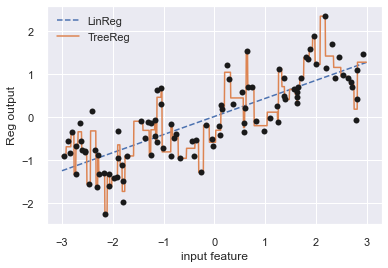

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1) # X_test
reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label='LinReg') 
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label='TreeReg') 

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('Reg output')
plt.xlabel('input feature')
plt.legend(loc='best')

In [6]:
# 구간 분할(bining)

bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)

In [7]:
# OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
line_binned = encoder.transform(np.digitize(line, bins=bins))

Text(0.5, 0, 'input Feature')

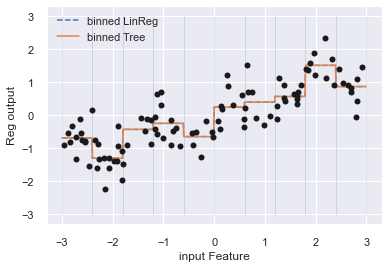

In [8]:
# 인코딩 후 다시 모델링하기

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='binned LinReg')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='binned Tree')

plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Reg output')
plt.xlabel('input Feature')

### 상호작용 추가하기

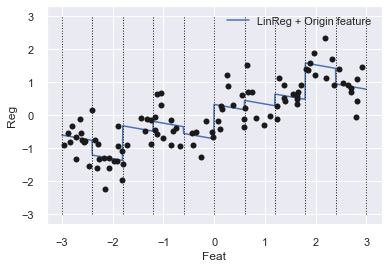

In [9]:
# 구간특성(10) + 원본특성(1)
X_combined = np.hstack([X,X_binned])
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='LinReg + Origin feature')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc='best')
plt.ylabel('Reg')
plt.xlabel('Feat')
plt.plot(X[:,0], y, 'o', c='k')

Text(0.5, 0, 'Feat')

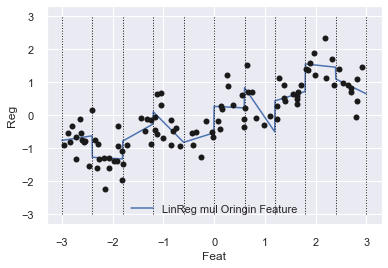

In [10]:
# 구간특성 + (구간특성*원래특성)

X_product = np.hstack([X_binned, X * X_binned])
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='LinReg mul Oringin Feature')

for bin in bins:
    plt.plot([bin, bin], [-3,3], ':', c='k', linewidth=1)

plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc='best')
plt.ylabel('Reg')
plt.xlabel('Feat')


### 다항식 추가하기

#### 다항식 추가 선형 모델 VS svm

In [11]:
from sklearn.preprocessing import PolynomialFeatures
# x**10까지 고차항을 추가한다.
# 기본값인 'include_bias=True'는 절편을 위해 값이 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

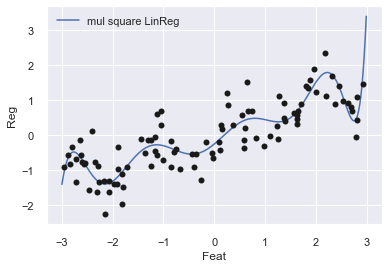

In [12]:
# 다항식을 추가한 선형 회귀
reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='mul square LinReg')
plt.legend(loc='best')
plt.ylabel('Reg')
plt.xlabel('Feat')
plt.plot(X[:,0], y, 'o', c='k')

Text(0.5, 0, 'Feat')

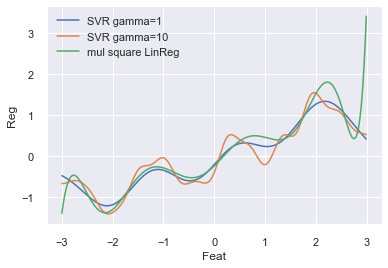

In [13]:
# 원본특성의 svm 모델 vs  다항식 선형 모델
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(line, reg.predict(line_poly), label='mul square LinReg')
plt.legend(loc='best')
plt.ylabel('Reg')
plt.xlabel('Feat')

#### 보스턴 주택 가격 데이터셋에 적용하기

In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

#데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# 다항식 특성 추가하기
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('\n{}'.format(poly.get_feature_names()))


['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [16]:
# Ridge로 비교하기(원본 특성 vs 다항식 추가)
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print('{:.2f}'.format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print('{:.2f}'.format(ridge.score(X_test_poly, y_test)))

0.62
0.75


### 일변량 비선형 변환

<BarContainer object of 141 artists>

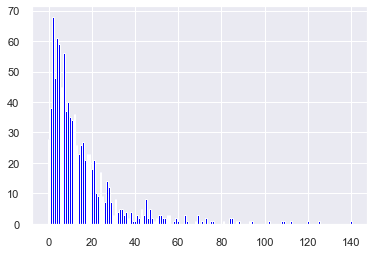

In [17]:
# 카운트 데이터 만들기
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)
y = np.dot(X_org, w) # (1000 X 3)*(3 X 1) = (1000 X 1) array

# 푸아송 분포의 데이터 만들기
X = rnd.poisson(10*np.exp(X_org))
'\n{}'.format(np.bincount(X[:,0]))

# X[0]의 히스토그램
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='blue')


0.622


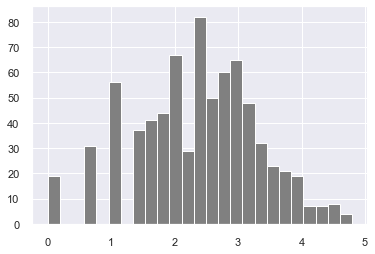

0.875


In [18]:
# X에 Ridge 회귀 적용하기
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('{:.3f}'.format(score))

# X를 log 스케일로 변환하기
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1) 
plt.hist(X_train_log[:,0], bins=25, color='grey')
plt.show()

# 다시 Ridge 적용하기
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('{:.3f}'.format(score))

### 특성 자동 선택

#### 일변량 통계(univariate statistics)

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생합니다.
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가한다.
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, 
                                                    random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택한다.
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print(X_train.shape)
print(X_train_selected.shape)                           

(284, 80)
(284, 40)


(285, 80)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


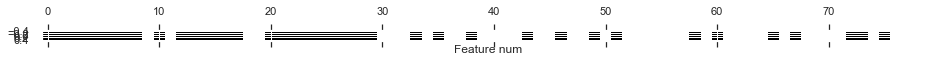

In [42]:
# get_support()로 선택된 특성 확인하기
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Feature num')
plt.show()

In [44]:
# 전체 특성(80) VS 선택 특성(40) : LogisticRegression
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('{:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('{:.3f}'.format(lr.score(X_test_selected, y_test)))

0.919
0.916


In [51]:
print(select.pvalues_)
print(select.scores_)

[2.87891478e+02 4.75857903e+01 3.10612785e+02 2.41276462e+02
 4.52640733e+01 1.69963025e+02 2.76369205e+02 4.42910141e+02
 3.53148760e+01 2.48339844e-01 1.14278701e+02 5.70579214e-01
 1.06724322e+02 9.10220232e+01 1.86834578e+00 1.68338460e+01
 9.09124140e+00 3.83019556e+01 2.14960839e-02 1.94090779e-01
 3.88608198e+02 6.36227382e+01 4.00380697e+02 2.81097472e+02
 7.08022342e+01 1.59204990e+02 2.42056413e+02 5.53000131e+02
 6.62873083e+01 3.03266462e+01 5.09796742e-01 2.19965073e-01
 2.81054688e-02 3.77480895e+00 5.89522779e-01 3.71661971e+00
 1.90263601e-02 2.01804626e-01 2.28670543e+00 4.46951210e-01
 7.81244165e-02 1.83974939e-01 5.60230622e-02 4.18386150e+00
 1.52965820e-01 3.77887289e-01 1.55740225e+00 1.41335016e+00
 1.30242498e-01 1.58331787e+00 8.81957793e-02 3.95307725e+00
 7.68258256e-02 1.10879240e+00 1.11481877e-02 3.55975928e-01
 2.16015641e-01 6.45761425e-01 3.05437654e+00 2.21520013e-01
 3.92860873e+00 8.15884138e-02 5.81255747e-01 1.20172727e+00
 2.04043714e-01 2.202537

#### 모델 기반 선택(model-based selection)

In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [60]:
X_test_l1 = select.transform(X_test)

lr.fit(X_train, y_train)
print('{:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_l1, y_train)
print('{:.3f}'.format(lr.score(X_test_l1, y_test)))

0.919
0.930


#### 반복적 선택(iterative selection)

In [74]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)
select.fit(X_train, y_train)
X_train_rfe = select.transform(X_train)

mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

In [75]:
X_test_rfe = select.transform(X_test)

select.score(X_test, y_test)

0.9508771929824561

### 사전 지식을 활용한 특성공학

In [2]:
citibike = mglearn.datasets.load_citibike()

'이와 같은 시계열 데이터를 이용한 예측작업은 \n과거 데이터(train)에서 학습하여 미래(test)를 예측하는 방식을 사용한다.'

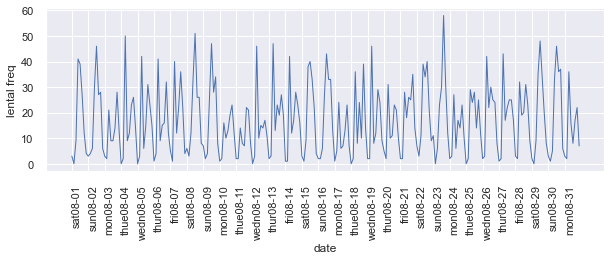

In [40]:
# 8월 한 달 동안의 대여 횟수를 그래프로 나타내기
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ['sun', 'mon', 'thue', 'wedn', 'thur', 'fri', 'sat']
xticks_name = [week[int(w)]+ d for w, d in zip(xticks.strftime('%w'),
                                              xticks.strftime('%m-%d'))]
plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('date')
plt.ylabel('lental freq')

'''이와 같은 시계열 데이터를 이용한 예측작업은 
과거 데이터(train)에서 학습하여 미래(test)를 예측하는 방식을 사용한다.'''

#### Random Forest로 예측하기

In [46]:
# POSIX 시간을 특성으로 했을 때 예측

# 타깃값(대여 횟수) 추출
y = citibike.values
# POSIX 시간을 10**9로 나누어 변환
X = citibike.index.astype('int64').values.reshape(-1,1) // 10**9

n_train = 184

In [52]:
# 주어진 특성을 사용하여 평가하고 그래프를 그린다.
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:] 
    y_train, y_test = target[:n_train], target[n_train:] 
    
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha='left')

    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    
    plt.plot(range(n_train), y_pred_train, '--', label='train_pred')
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='test_pred')

    plt.legend(loc=(1.01, 0))
    plt.xlabel('date')
    plt.ylabel('lental freq')
    
    print('test r^2 : {:.2f}'.format(regressor.score(X_test, y_test)))

test r^2 : -0.04


'R^2는 -0.04로 거의 학습되지 않았다.'

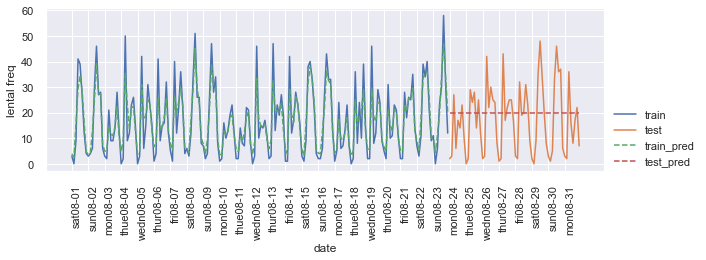

In [54]:
# 랜덤 포레스트는 데이터 전처리가 거의 필요하지 않아 맨 처음 시도해보기 좋은 모델이다.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

'''R^2는 -0.04로 거의 학습되지 않았다.
-> 트리 모델은 훈련 세트에 있는 특성의 범위 밖으로 외삽할 수 없다.
-> 마지막 훈련 세트 데이터의 타깃값을 예측으로 사용한다.'''

test r^2 : 0.60
test r^2 : 0.84


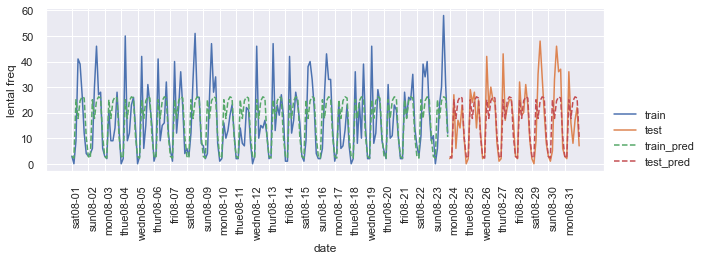

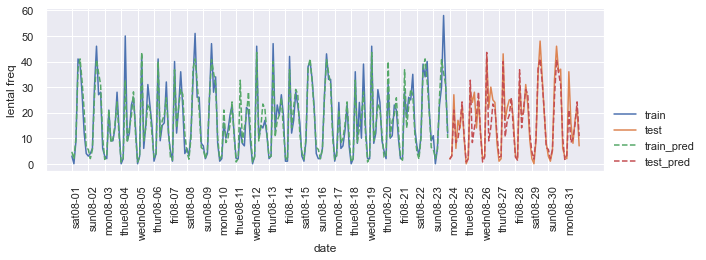

In [62]:
# 시간을 특성으로 예측
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

# 요일 정보 추가했을 때 예측
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

#### 선형 모델로 예측하기

test r^2 : 0.13
test r^2 : 0.61


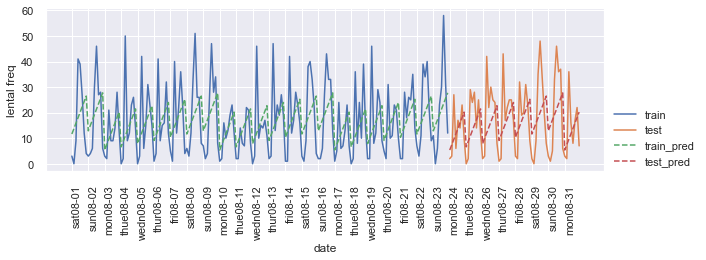

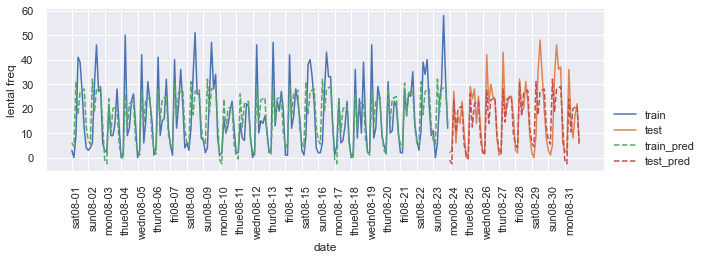

In [67]:
# LinearRegressor 적용하기
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

'''요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석되기 때문에 성능이 좋지 않다.
   선형 모델은 시간을 선형 함수로만 학습할 수 있어서, 하루에서 시간이 흐를수록 대여 수가 늘어나게 학습되었다.'''

# OneHotEncoder로 정수형을 범주형으로 바꾸기
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, LinearRegression())

'''이 선형 모델은 요일마다 하나의 계수를 학습하고, 시간마다도 하나의 계수를 학습한다.
   이 말은 시간 패턴이 모든 날에 걸쳐 공유된다는 뜻이다.'''

test r^2 : 0.85


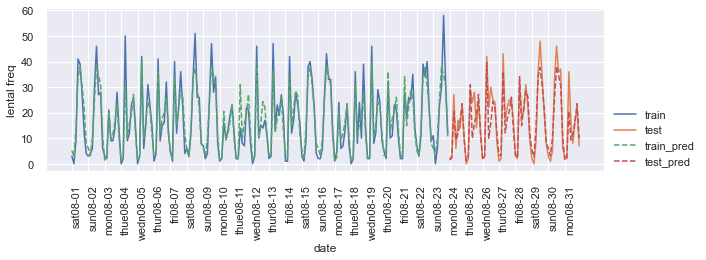

In [73]:
# 상호작용 특성을 사용하여 시간과 요일의 조합별 계수를 학습하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
poly = PolynomialFeatures(degree=2, interaction_only=True,
                                            include_bias=False)
X_hour_week_onehot_poly = poly.fit_transform(X_hour_week_onehot)
lr = Ridge() 
eval_on_features(X_hour_week_onehot_poly, y, lr)           

'''랜텀 포레스트와 달리 무엇이 학습되었는지가 명확하다.'''

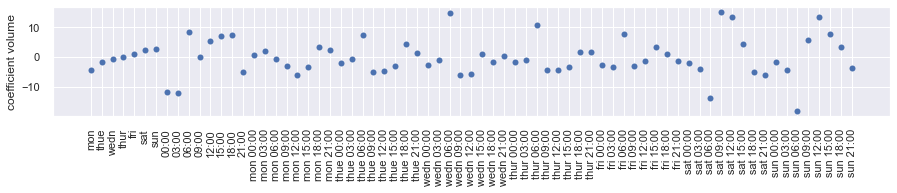

In [82]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['mon', 'thue', 'wedn', 'thur', 'fri', 'sat', 'sun']
features = day + hour

# get_feature_names 메서드로 상호작용 특성에 이름을 달고, 계수가 0이 아닌 특성만 선택한다.
features_poly = poly.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

# 모델이 학습한 계수를 그래프로 나타내기
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.ylabel('coefficient volume')
plt.show()